# 1. Préliminaires

## 1.1. Imports

In [1]:
# Importation des librairies

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.collections import  LineCollection
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


## 1.2. Chargement des données

In [2]:
# Chargement des données
df = pd.read_csv('./data/my_courses.csv',decimal=".",index_col=0)

#affichage des 5 premières lignes
df.head()

,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations,derniereMiseAJour,idCours
titreCours,,,,,,,,,,
Classez_et_segmentez_des_données_visuelles,29,34,NaN,15.0,3,11,0.666667,3,22,4470531
Initiez-vous_à_la_statistique_inférentielle,55,4,86.0,12.0,2,21,0.750000,4,8,4525306
Maîtrisez_les_bases_des_probabilités,60,100,NaN,NaN,1,1,NaN,0,89,4525296
Découvrez_les_librairies_Python_pour_la_Data_Science,64,64,96.0,10.0,2,8,0.000000,2,57,4452741
Devenez_mentor_sur_OpenClassrooms,76,100,91.0,6.0,1,12,1.000000,3,29,3595541


# 2. Préparation des données

## 2.1 Vérification rapide

In [3]:
# affichage de la taille du tableau
df.shape

(19, 10)

In [4]:
# vérification du type des colonnes
df.info()

<class 'pandas.DataFrame'>
Index: 19 entries, Classez_et_segmentez_des_données_visuelles to Développez_votre_site_web_avec_le_framework_Symfony
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   inscription          19 non-null     int64  
 1   progression          19 non-null     int64  
 2   moyenneDeClasse      15 non-null     float64
 3   duree                18 non-null     float64
 4   difficulte           19 non-null     int64  
 5   nbChapitres          19 non-null     int64  
 6   ratioQuizEvaluation  16 non-null     float64
 7   nbEvaluations        19 non-null     int64  
 8   derniereMiseAJour    19 non-null     int64  
 9   idCours              19 non-null     int64  
dtypes: float64(3), int64(7)
memory usage: 1.6+ KB


In [5]:
# affichage de statistiques principales
df.describe()

,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations,derniereMiseAJour,idCours
count,19.000000,19.000000,15.000000,18.000000,19.000000,19.000000,16.000000,19.000000,19.000000,1.900000e+01
mean,235.473684,44.052632,89.400000,15.000000,1.894737,15.210526,0.617560,2.947368,78.578947,3.967983e+06
std,167.684349,36.326412,3.996427,10.318459,0.657836,9.223032,0.246053,1.715086,63.453671,1.075638e+06
min,29.000000,2.000000,84.000000,1.000000,1.000000,1.000000,0.000000,0.000000,8.000000,2.353440e+05
25%,134.000000,4.000000,85.500000,8.500000,1.500000,8.500000,0.500000,2.000000,22.000000,4.056556e+06
50%,195.000000,44.000000,90.000000,13.500000,2.000000,13.000000,0.666667,3.000000,61.000000,4.421146e+06
75%,310.500000,70.000000,92.000000,20.000000,2.000000,20.500000,0.750000,4.000000,146.500000,4.469006e+06
max,713.000000,100.000000,96.000000,40.000000,3.000000,38.000000,1.000000,7.000000,186.000000,4.525306e+06


In [6]:
# verification des valeurs nulles
df.isna().sum()

inscription            0
progression            0
moyenneDeClasse        4
duree                  1
difficulte             0
nbChapitres            0
ratioQuizEvaluation    3
nbEvaluations          0
derniereMiseAJour      0
idCours                0
dtype: int64

In [7]:
# remplacement des valeurs manquantes pour la durée par la moyenne
df.fillna(df.mean(),inplace=True)

,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations,derniereMiseAJour,idCours
titreCours,,,,,,,,,,
Classez_et_segmentez_des_données_visuelles,29,34,89.4,15.0,3,11,0.666667,3,22,4470531
Initiez-vous_à_la_statistique_inférentielle,55,4,86.0,12.0,2,21,0.750000,4,8,4525306
Maîtrisez_les_bases_des_probabilités,60,100,89.4,15.0,1,1,0.617560,0,89,4525296
Découvrez_les_librairies_Python_pour_la_Data_Science,64,64,96.0,10.0,2,8,0.000000,2,57,4452741
Devenez_mentor_sur_OpenClassrooms,76,100,91.0,6.0,1,12,1.000000,3,29,3595541
Initiez-vous_à_l'algèbre_relationnelle_avec_le_langage_SQL,192,14,92.0,20.0,2,25,0.500000,4,25,4449026
Maintenez-vous_à_jour_en_développement,192,80,89.4,2.0,1,3,0.617560,0,145,4057661
Entraînez_un_modèle_prédictif_linéaire,193,65,84.0,10.0,2,9,0.500000,2,182,4444646
Explorez_vos_données_avec_des_algorithmes_non_supervisés,193,75,85.0,15.0,3,13,0.666667,3,22,4379436


In [8]:
# verification des lignes dupliquées
df.duplicated().sum()

np.int64(0)

## 2.2. Choix des colonnes

In [9]:
# liste des colonnes sélectionnées
cols = [
    "inscription",
    "progression",
    "moyenneDeClasse",
    "duree",
    "difficulte",
    "nbChapitres",
    "ratioQuizEvaluation",
    "nbEvaluations",
]

# modification du dataset original
df = df[cols]

# affichage d'un extrait du nouveau dataframe
df.head()

,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations
titreCours,,,,,,,,
Classez_et_segmentez_des_données_visuelles,29,34,89.4,15.0,3,11,0.666667,3
Initiez-vous_à_la_statistique_inférentielle,55,4,86.0,12.0,2,21,0.750000,4
Maîtrisez_les_bases_des_probabilités,60,100,89.4,15.0,1,1,0.617560,0
Découvrez_les_librairies_Python_pour_la_Data_Science,64,64,96.0,10.0,2,8,0.000000,2
Devenez_mentor_sur_OpenClassrooms,76,100,91.0,6.0,1,12,1.000000,3


In [10]:
df.isna().sum()

inscription            0
progression            0
moyenneDeClasse        0
duree                  0
difficulte             0
nbChapitres            0
ratioQuizEvaluation    0
nbEvaluations          0
dtype: int64

## 2.3 Séparation des données

In [11]:
# Création de la matrice X
X=df.values
X.shape

(19, 8)

In [12]:
# Création de la variable name issu des index
names = df.index

In [13]:
# features/colonnes
features = df.columns

# 3. ACP

## 3.1. Scalage
Centrons et Reduisons nos données

In [ ]:
# scalons nos données
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

In [17]:
# verifions l'etat des données scalées
pd.DataFrame(X_Scaled).describe().round(2).loc[["mean", "std"], :]

,0,1,2,3,4,5,6,7
mean,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00
std,1.03,1.03,1.03,1.03,1.03,1.03,1.03,1.03


## 3.2. ACP
Nous allons travailler sur les 6 premières composantes.

In [18]:
# on définit le nombre de composantes
n_components = 6

In [19]:
# on instancie PCA
pca = PCA(n_components=n_components)

In [20]:
# on l'entraine sur les données scalées
pca.fit(X_Scaled)

,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",6
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}, default='auto'""auto"" : The solver is selected by a default 'auto' policy is based on `X.shape` and `n_components`: if the input data has fewer than 1000 features and more than 10 times as many samples, then the ""covariance_eigh"" solver is used. Otherwise, if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ""randomized"" method is selected. Otherwise the exact ""full"" SVD is computed and optionally truncated afterwards.""full"" : Run exact full SVD calling the standard LAPACK solver via `scipy.linalg.svd` and select the components by postprocessing""covariance_eigh"" : Precompute the covariance matrix (on centered data), run a classical eigenvalue decomposition on the covariance matrix typically using LAPACK and select the components by postprocessing. This solver is very efficient for n_samples >> n_features and small n_features. It is, however, not tractable otherwise for large n_features (large memory footprint required to materialize the covariance matrix). Also note that compared to the ""full"" solver, this solver effectively doubles the condition number and is therefore less numerical stable (e.g. on input data with a large range of singular values).""arpack"" : Run SVD truncated to `n_components` calling ARPACK solver via `scipy.sparse.linalg.svds`. It requires strictly `0 < n_components < min(X.shape)`""randomized"" : Run randomized SVD by the method of Halko et al... versionadded:: 0.18.0.. versionchanged:: 1.5 Added the 'covariance_eigh' solver.",'auto'
,"tol tol: float, default=0.0Tolerance for singular values computed by svd_solver == 'arpack'.Must be of range [0.0, infinity)... versionadded:: 0.18.0",0.0
,"iterated_power iterated_power: int or 'auto', default='auto'Number of iterations for the power method computed bysvd_solver == 'randomized'.Must be of range [0, infinity)... versionadded:: 0.18.0",'auto'
,"n_oversamples n_oversamples: int, default=10This parameter is only relevant when `svd_solver=""randomized""`.It corresponds to the additional number of random vectors to sample therange of `X` so as to ensure proper conditioning. See:func:`~sklearn.utils.extmath.randomized_svd` for more details... versionadded:: 1.1",10
,"power_iteration_normalizer power_iteration_normalizer: {'auto', 'QR', 'LU', 'none'}, default='auto'Power iteration normalizer for randomized SVD 

## 3.3. Variance expliquée et screeplot

Intéressons nous à la variance captée par chaque composante


In [22]:
exp_var_ratio = pca.explained_variance_ratio_
exp_var_ratio

array([0.4715944 , 0.15651041, 0.13676841, 0.11908719, 0.04148031,
       0.03042718])

In [26]:
for i in range(len(exp_var_ratio)):
    print(f"Composante {i+1} - {exp_var_ratio[i]:.1%}")

Composante 1 - 47.2%
Composante 2 - 15.7%
Composante 3 - 13.7%
Composante 4 - 11.9%
Composante 5 - 4.1%
Composante 6 - 3.0%


On remarque que les deux premières composantes captent 62.9% de la variance expliquée et 76.6% pour les trois premières composantes.

Enregistrons ses valeurs dans une variable

In [33]:
scree = (exp_var_ratio*100).round(2)
scree

array([47.16, 15.65, 13.68, 11.91,  4.15,  3.04])

Calculons la somme cumulée des variances

In [34]:
scree_cum = scree.cumsum().round()
scree_cum

array([47., 63., 76., 88., 93., 96.])

pca

Maintenant définissons une variable avec la liste de nos composantes

In [ ]:
# liste de chaine de caractère pour forcer le mode categorielle
x_list =  [str(i+1) for i in range(n_components)]
list(x_list)

['1', '2', '3', '4', '5', '6']

On va dessiné un barplot pour  variance de chaque composante et un lineplot pour la variance cumulée

On remarque alors que près de 80% de la variance est expliquée par les 3 premiers composantes

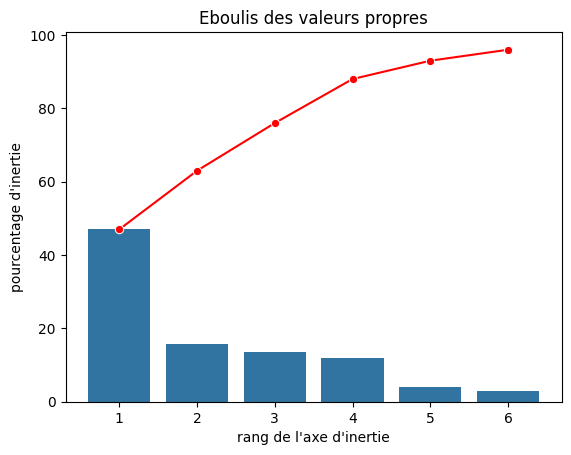

In [ ]:
sns.barplot(x=x_list, y=scree)
sns.lineplot(x=x_list,y=scree_cum,c="red",marker="o")
plt.title("Eboulis des valeurs propres")
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.show()